# Predicting the model based on feature extraction

### This below two cell must be executed to access data from drive (if it's stored on it ), if you want run it on Google Colab

In [ ]:
!apt-get install -y -qq software-properties-common python-software-properties module-init-tools
!add-apt-repository -y ppa:alessandro-strada/ppa 2>&1 > /dev/null
!apt-get update -qq 2>&1 > /dev/null
!apt-get -y install -qq google-drive-ocamlfuse fuse

from google.colab import auth
auth.authenticate_user()
from oauth2client.client import GoogleCredentials
creds = GoogleCredentials.get_application_default()
import getpass

!google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret} < /dev/null 2>&1 | grep URL
vcode = getpass.getpass()
!echo {vcode} | google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret}

In [0]:
!mkdir -p drive
!google-drive-ocamlfuse drive

In [3]:
cd drive/

/content/drive


## Actual code starts from here

### Loading the model

In [5]:
from keras.models import load_model
from keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Using TensorFlow backend.


In [6]:
model = load_model('/content/drive/cancer_classification_model_using_feature_extraction_VGG16.h5')

/usr/local/lib/python3.6/dist-packages/keras/models.py:318: UserWarning: Error in loading the saved optimizer state. As a result, your model is starting with a freshly initialized optimizer.
  warnings.warn('Error in loading the saved optimizer '


In [0]:
def load_image(img_path, show=True):
    img = image.load_img(img_path, target_size=(320, 320))
    plt.imshow(img)                           
    img = image.load_img(img_path, target_size=(320, 320))
    img = np.reshape(img,[1,320,320,3])
    return img

In [0]:
def displaying_prediction(img):
  pred = model.predict(img)
  #prediction = []
  if pred > 0.5:
    print('Malignant')
  else:
    print('Benign')

  

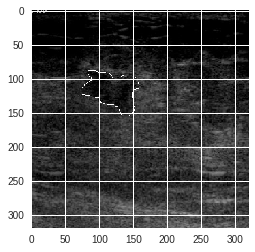

In [19]:
img = load_image('/content/drive/malignant.jpg')

In [20]:
displaying_prediction(img)

Malignant


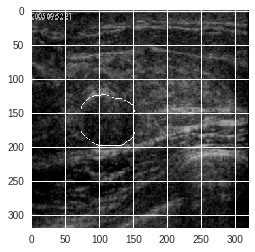

In [17]:
img = load_image('/content/drive/B.jpg')

In [18]:
displaying_prediction(img)

Benign
